<a href="https://colab.research.google.com/github/khilan122/Soft-Computing/blob/main/SC_P8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np, random, operator, pandas as pd
import matplotlib.pyplot as plt


In [ ]:
def create_starting_population(size,Number_of_city):
    
    population = []
    
    for i in range(0,size):
        population.append(create_new_member(Number_of_city))
        
    return population

In [ ]:
def pick_mate(N):
    
    i=random.randint(0,N)    
    return i

In [ ]:
def distance(i,j):
     
    return np.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2)
    

In [ ]:
def score_population(population, CityList):  
    
    scores = []
  
    for i in population:
        #print(i)
        scores.append(fitness(i, CityList))
        #print([fitness(i, the_map)])
    return scores

In [ ]:
def fitness(route,CityList):
    
    score=0
    for i in range(1,len(route)):
        k=int(route[i-1])
        l=int(route[i])

        score = score + distance(CityList[k],CityList[l])
        
        
    return score

In [ ]:
def create_new_member(Number_of_city):
    
    pop=set(np.arange(Number_of_city,dtype=int))
    route=list(random.sample(pop,Number_of_city))
            
    return route

In [ ]:
def crossover(a,b):
    
    child=[]
    childA=[]
    childB=[]
    
    
    geneA=int(random.random()* len(a))
    geneB=int(random.random()* len(a))
    
    start_gene=min(geneA,geneB)
    end_gene=max(geneA,geneB)
    
    for i in range(start_gene,end_gene):
        childA.append(a[i])
        
    childB=[item for item in a if item not in childA]
    child=childA+childB
    
    
    
       
    return child


In [ ]:
def mutate(route,probablity):
    
    
    route=np.array(route)
    for swaping_p in range(len(route)):
        if(random.random() < probablity):
            swapedWith = np.random.randint(0,len(route))
            
            temp1=route[swaping_p]
            
            temp2=route[swapedWith]
            route[swapedWith]=temp1
            route[swaping_p]=temp2
    
    return route
    
    
    

In [ ]:
def selection(popRanked, eliteSize):
    selectionResults=[]
    result=[]
    for i in popRanked:
        result.append(i[0])
    for i in range(0,eliteSize):
        selectionResults.append(result[i])
    
    return selectionResults

In [ ]:
def rankRoutes(population,City_List):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = fitness(population[i],City_List)
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = False)

In [ ]:
def breedPopulation(mating_pool):
    children=[]
    for i in range(len(mating_pool)-1):
            children.append(crossover(mating_pool[i],mating_pool[i+1]))
    return children

In [ ]:
def mutatePopulation(children,mutation_rate):
    new_generation=[]
    for i in children:
        muated_child=mutate(i,mutation_rate)
        new_generation.append(muated_child)
    return new_generation

In [ ]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [ ]:
def next_generation(City_List,current_population,mutation_rate,elite_size):
    population_rank=rankRoutes(current_population,City_List)
    
    selection_result=selection(population_rank,elite_size)
    
    mating_pool=matingPool(current_population,selection_result)
    
    children=breedPopulation(mating_pool)
    
    next_generation=mutatePopulation(children,mutation_rate)
    
    return next_generation

In [ ]:
def genetic_algorithm(City_List,size_population=1000,elite_size=75,mutation_Rate=0.05,generation=2000):
    
    pop=[]
    progress = []
    
    Number_of_cities=len(City_List)
    
    population=create_starting_population(size_population,Number_of_cities)
    progress.append(rankRoutes(population,City_List)[0][1])
    print(f"initial route distance {progress[0]}")
    print(f"initial route {population[0]}")
    for i in range(0,generation):
        pop = next_generation(City_List,population,mutation_Rate,elite_size)
        progress.append(rankRoutes(pop,City_List)[0][1])
    
    
    rank_=rankRoutes(pop,City_List)[0]
    
    print(f"Best Route :{pop[rank_[0]]} ")
    print(f"best route distance {rank_[1]}")
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    
    return rank_, pop
    
        

In [ ]:
cityList = []


for i in range(0,25):
    x=int(random.random() * 200)
    y=int(random.random() * 200)
    cityList.append((x,y))

initial route distance 1874.7533903995036
initial route [20, 16, 15, 5, 13, 19, 6, 17, 2, 11, 21, 7, 22, 9, 24, 8, 18, 10, 14, 1, 12, 23, 4, 3, 0]
Best Route :[19 18  5 21 24 15  9 17 13 23  4 22  1  3 12  0  2  8 14 16 10 11  6  7
 20] 
best route distance 1875.0385243969286


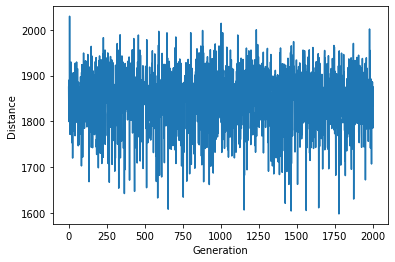

In [ ]:
rank_,pop=genetic_algorithm(City_List=cityList)

In [ ]:
x_axis=[]
y_axis=[]
for i in cityList:
    x_axis.append(i[0])
    y_axis.append(i[1])

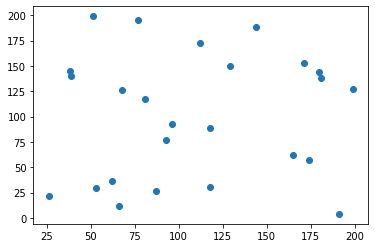

In [ ]:
plt.scatter(x_axis,y_axis)
plt.show()